In [1]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Reading respective csv files

train = pd.read_csv("train_cab.csv")
test = pd.read_csv("test.csv")

In [3]:
train.shape

(16067, 7)

In [4]:
test.shape

(9914, 6)

In [5]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


In [6]:
train.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16067.000000,16067.000000,16067.000000,16067.000000,16012.000000
mean,-72.462787,39.914725,-72.462328,39.897906,2.625070
std,10.578384,6.826587,10.575062,6.187087,60.844122
min,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,-73.992156,40.734927,-73.991182,40.734651,1.000000
50%,-73.981698,40.752603,-73.980172,40.753567,1.000000
75%,-73.966838,40.767381,-73.963643,40.768013,2.000000
max,40.766125,401.083332,40.802437,41.366138,5345.000000


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16067 entries, 0 to 16066
Data columns (total 7 columns):
fare_amount          16043 non-null object
pickup_datetime      16067 non-null object
pickup_longitude     16067 non-null float64
pickup_latitude      16067 non-null float64
dropoff_longitude    16067 non-null float64
dropoff_latitude     16067 non-null float64
passenger_count      16012 non-null float64
dtypes: float64(5), object(2)
memory usage: 878.7+ KB


In [8]:
# Converting fare_amount to numeric datatype

train["fare_amount"] = pd.to_numeric(train["fare_amount"], errors='coerce')

In [9]:
# Checking for null values in train and test datasets

train.isnull().sum().sort_values(ascending=False)

passenger_count      55
fare_amount          25
dropoff_latitude      0
dropoff_longitude     0
pickup_latitude       0
pickup_longitude      0
pickup_datetime       0
dtype: int64

In [10]:
test.isnull().sum().sort_values(ascending=False)

passenger_count      0
dropoff_latitude     0
dropoff_longitude    0
pickup_latitude      0
pickup_longitude     0
pickup_datetime      0
dtype: int64

In [11]:
(train["passenger_count"].isnull().sum() / len(train)) * 100

0.34231654944918155

In [12]:
(train["fare_amount"].isnull().sum() / len(train)) * 100

0.15559843156780978

In [13]:
# Since the percentage of null values is very less we will be dropping the corresponding rows.
# Dropping null values from training dataset

train = train.drop(train[train.isnull().any(1)].index, axis = 0)

In [14]:
train.shape

(15987, 7)

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15987 entries, 0 to 16065
Data columns (total 7 columns):
fare_amount          15987 non-null float64
pickup_datetime      15987 non-null object
pickup_longitude     15987 non-null float64
pickup_latitude      15987 non-null float64
dropoff_longitude    15987 non-null float64
dropoff_latitude     15987 non-null float64
passenger_count      15987 non-null float64
dtypes: float64(6), object(1)
memory usage: 999.2+ KB


In [16]:
# Converting pickup_datetime to datetime datatype and removing default timezone

train['pickup_datetime'] = pd.to_datetime(train['pickup_datetime'], errors='coerce').dt.tz_localize(None)
test['pickup_datetime'] = pd.to_datetime(test['pickup_datetime'], errors='coerce').dt.tz_localize(None)

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15987 entries, 0 to 16065
Data columns (total 7 columns):
fare_amount          15987 non-null float64
pickup_datetime      15986 non-null datetime64[ns]
pickup_longitude     15987 non-null float64
pickup_latitude      15987 non-null float64
dropoff_longitude    15987 non-null float64
dropoff_latitude     15987 non-null float64
passenger_count      15987 non-null float64
dtypes: datetime64[ns](1), float64(6)
memory usage: 999.2 KB


In [18]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,15987.000000,15987.000000,15987.000000,15987.000000,15987.000000,15987.000000
mean,15.030232,-72.464447,39.915627,-72.464005,39.898725,2.623170
std,431.200458,10.573270,6.828818,10.569932,6.186185,60.890237
min,-3.000000,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,6.000000,-73.992143,40.734927,-73.991182,40.734651,1.000000
50%,8.500000,-73.981693,40.752603,-73.980168,40.753557,1.000000
75%,12.500000,-73.966819,40.767353,-73.963644,40.768005,2.000000
max,54343.000000,40.766125,401.083332,40.802437,41.366138,5345.000000


In [19]:
# Counting negative fare values

len(train[train['fare_amount'] < 0])

3

In [20]:
# Dropping the negative fare values

train = train.drop(train[train['fare_amount']<0].index, axis=0)

In [21]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,15984.000000,15984.000000,15984.000000,15984.000000,15984.000000,15984.000000
mean,15.033579,-72.464172,39.915480,-72.463730,39.898574,2.623287
std,431.240855,10.574243,6.829450,10.570905,6.186756,60.895947
min,0.000000,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,6.000000,-73.992140,40.734935,-73.991182,40.734661,1.000000
50%,8.500000,-73.981691,40.752605,-73.980168,40.753562,1.000000
75%,12.500000,-73.966822,40.767356,-73.963645,40.768006,2.000000
max,54343.000000,40.766125,401.083332,40.802437,41.366138,5345.000000


In [22]:
train['passenger_count'].value_counts()

1.00       11240
2.00        2319
5.00        1044
3.00         675
4.00         327
6.00         301
0.00          57
43.00          2
53.00          2
536.00         1
535.00         1
5345.00        1
35.00          1
5334.00        1
554.00         1
537.00         1
0.12           1
1.30           1
531.20         1
345.00         1
456.00         1
557.00         1
354.00         1
58.00          1
236.00         1
87.00          1
Name: passenger_count, dtype: int64

In [23]:
# Assuming a cab has maximum 6 seats. So removing values above 6.

len(train[train['passenger_count'] > 6]) * 100 / len(train)

0.11886886886886887

In [24]:
train = train[train['passenger_count'] <= 6]

In [25]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,15965.000000,15965.000000,15965.000000,15965.000000,15965.000000,15965.000000
mean,15.041893,-72.471634,39.919595,-72.471190,39.902669,1.643496
std,431.497319,10.549281,6.818837,10.545931,6.174244,1.267275
min,0.000000,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,6.000000,-73.992145,40.734935,-73.991182,40.734702,1.000000
50%,8.500000,-73.981693,40.752615,-73.980168,40.753574,1.000000
75%,12.500000,-73.966824,40.767380,-73.963643,40.768026,2.000000
max,54343.000000,40.766125,401.083332,40.802437,41.366138,6.000000


In [26]:
train['passenger_count'].value_counts()

1.00    11240
2.00     2319
5.00     1044
3.00      675
4.00      327
6.00      301
0.00       57
1.30        1
0.12        1
Name: passenger_count, dtype: int64

In [27]:
# 0 passengers are outliers, as fare amount cannot be charged if there are no passengers.
len(train[train['passenger_count'] == 0]) * 100 / len(train)

0.35703100532414656

In [28]:
# Dropping rows with 0 passengers. 
# Since there are two values 1.3 and 0.12, we drop them as well.

train.drop(train[train['passenger_count']==0].index, axis=0, inplace=True)
train.drop(train[train['passenger_count']==1.3].index, axis=0, inplace=True)
train.drop(train[train['passenger_count']==0.12].index, axis=0, inplace=True)

In [29]:
# Converting float values to integer.

train.passenger_count = train.passenger_count.apply(np.int64)

In [30]:
train.passenger_count.value_counts()

1    11240
2     2319
5     1044
3      675
4      327
6      301
Name: passenger_count, dtype: int64

In [31]:
# Detecting outliers in fare amount variable.

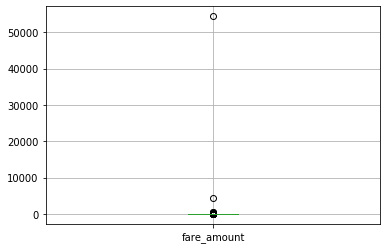

In [32]:
train.boxplot('fare_amount');

In [33]:
# As from the diagram we can see there are outliers.
# Let's check and remove them.

In [34]:
train.fare_amount.sort_values(ascending=False)

1015     54343.00
1072      4343.00
607        453.00
980        434.00
1335       180.00
1483       165.00
6630       128.83
14142      108.00
12349      104.67
12915       96.00
7810        95.00
9431        88.00
10077       87.30
12614       87.00
4620        85.50
14519       82.50
12437       80.75
2639        79.00
4013        77.70
13962       77.15
2013        77.00
6668        76.80
8363        76.00
10524       75.80
11019       75.33
13615       75.00
15023       73.30
1494        70.00
4118        69.70
9651        66.30
           ...   
6297         2.50
4058         2.50
15490        2.50
1671         2.50
13877        2.50
15370        2.50
1419         2.50
6276         2.50
5449         2.50
3558         2.50
7908         2.50
1750         2.50
13571        2.50
12705        2.50
12178        2.50
11153        2.50
4539         2.50
376          2.50
472          2.50
4954         2.50
7918         2.50
11222        2.50
8263         2.50
1684         2.50
9177      

In [35]:
train.drop(train[train.fare_amount > 400].index, axis=0, inplace=True)

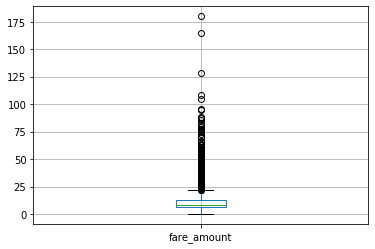

In [36]:
train.boxplot('fare_amount');

In [37]:
train['pickup_latitude'].describe()

count    15902.000000
mean        39.921445
std          6.817455
min        -74.006893
25%         40.734949
50%         40.752636
75%         40.767382
max        401.083332
Name: pickup_latitude, dtype: float64

In [38]:
train['pickup_longitude'].describe()

count    15902.000000
mean       -72.474982
std         10.538451
min        -74.438233
25%        -73.992141
50%        -73.981686
75%        -73.966801
max         40.766125
Name: pickup_longitude, dtype: float64

In [39]:
# Latitude ranges from -90 to 90
# Longitude ranges from -180 to 180

In [40]:
train[(train['pickup_latitude'] < -90) | (train['pickup_latitude'] > 90)] 

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
5686,3.3,2011-07-30 11:15:00,-73.947235,401.083332,-73.951392,40.778927,1


In [41]:
train[(train['dropoff_latitude'] < -90) | (train['dropoff_latitude'] > 90)]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [42]:
train[(train['pickup_longitude'] < -180) | (train['pickup_longitude'] > 180)]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [43]:
train[(train['dropoff_longitude'] < -180) | (train['dropoff_longitude'] > 180)]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [44]:
# As seen above, only pickup latitude column has value greater than 90. Hence we will drop that row.
train.drop((train[(train['pickup_latitude'] < -90) | (train['pickup_latitude'] > 90)]).index, axis=0, inplace=True)

In [45]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,15901.000000,15901.000000,15901.000000,15901.000000,15901.000000,15901.000000
mean,11.320987,-72.474889,39.898732,-72.465149,39.899262,1.649645
std,9.668455,10.538776,6.186797,10.566703,6.186423,1.265884
min,0.000000,-74.438233,-74.006893,-74.429332,-74.006377,1.000000
25%,6.000000,-73.992142,40.734948,-73.991181,40.734714,1.000000
50%,8.500000,-73.981689,40.752633,-73.980158,40.753565,1.000000
75%,12.500000,-73.966802,40.767382,-73.963643,40.768016,2.000000
max,180.000000,40.766125,41.366138,40.802437,41.366138,6.000000


In [46]:
train.dtypes

fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
dtype: object

In [47]:
test.dtypes

pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
dtype: object

In [48]:
# Now, for EDA. The following are my considerations -

# Does the number of passengers affect the fare?
# Does the date and time of pickup affect the fare?
# Does the day of the week affect the fare?
# Does the distance travelled affect the fare?
# First, let's split the datetime field 'pickup_datetime' to the following -

# year
# month
# date
# hour
# day of week
# Using these we shall calculate the day of the week and come to our conclusions about how pickup_location affects the fare. Also, create a new field 'distance' to fetch the distance between the pickup and the drop.

# We can calulate the distance in a sphere when latitudes and longitudes are given by Haversine formula

# haversine(θ) = sin²(θ/2)

# Eventually, the formula boils down to the following where φ is latitude, λ is longitude, R is earth’s radius (mean radius = 6,371km) to include latitude and longitude coordinates (A and B in this case).

# a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)

# c = 2 * atan2( √a, √(1−a) )

# d = R ⋅ c

# d = Haversine distance

In [49]:
def haversine_distance(lat1, long1, lat2, long2):
    data = [train, test]
    for i in data:
        radius_of_earth = 6371
        phi1 = np.radians(i[lat1])
        phi2 = np.radians(i[lat2])
        
        delta_phi = np.radians(i[lat2] - i[lat1])
        delta_lambda = np.radians(i[long2] - i[long1])
        
        a = np.sin(delta_phi / 2.0) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0) ** 2
        
        c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
        
        d = (radius_of_earth * c)
        
        i['haversine_distance'] = d
    return d

In [50]:
haversine_distance('pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')

0        2.323259
1        2.425353
2        0.618628
3        1.961033
4        5.387301
5        3.222549
6        0.929601
7       21.540102
8        3.873962
9        1.099794
10       2.317685
11       4.819179
12       0.722670
13       1.675503
14       2.504032
15       5.115375
16       0.298838
17       2.531147
18       0.780444
19       0.427282
20       1.651946
21       1.969211
22       1.305441
23       1.901295
24       5.779720
25       1.121687
26      14.306540
27       9.427870
28       1.144529
29       4.696371
          ...    
9884    15.119293
9885     5.006239
9886     7.376754
9887     1.680721
9888     0.000000
9889     2.377723
9890     2.944581
9891     5.952839
9892     2.950361
9893     4.735375
9894     3.101361
9895     9.000325
9896     2.398161
9897     5.081664
9898     0.555287
9899     5.610505
9900     1.890608
9901     1.530118
9902     3.891526
9903     2.299316
9904    15.091262
9905     9.613798
9906     0.369506
9907     9.923998
9908     1

In [51]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,haversine_distance
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,1.030764
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,8.450134
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,1.389525
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,2.799270
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,1.999157


In [52]:
test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,haversine_distance
0,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,2.323259
1,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,2.425353
2,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,0.618628
3,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,1.961033
4,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,5.387301


In [53]:
# Now that we have calculated the distance, we shall create columns for the following -

# year
# month
# date
# hour
# day of week

In [54]:
data = [train, test]
for i in data:
    i['year'] = i['pickup_datetime'].dt.year
    i['month'] = i['pickup_datetime'].dt.month
    i['date'] = i['pickup_datetime'].dt.day
    i['day_of_week'] = i['pickup_datetime'].dt.dayofweek
    i['hour'] = i['pickup_datetime'].dt.hour

In [55]:
#Dropping NaN values from the data
train.drop(train[train.year.isnull()].index,axis=0,inplace=True)

In [56]:
# Lets drop pickup_datetime as we have splitted it into multiple columns.
train.drop('pickup_datetime',axis=1,inplace=True)
test.drop('pickup_datetime',axis=1,inplace=True)

In [57]:
train.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,haversine_distance,year,month,date,day_of_week,hour
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,1.030764,2009.0,6.0,15.0,0.0,17.0
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,8.450134,2010.0,1.0,5.0,1.0,16.0
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,1.389525,2011.0,8.0,18.0,3.0,0.0
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2.799270,2012.0,4.0,21.0,5.0,4.0
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,1.999157,2010.0,3.0,9.0,1.0,7.0


In [58]:
test.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,haversine_distance,year,month,date,day_of_week,hour
0,-73.973320,40.763805,-73.981430,40.743835,1,2.323259,2015,1,27,1,13
1,-73.986862,40.719383,-73.998886,40.739201,1,2.425353,2015,1,27,1,13
2,-73.982524,40.751260,-73.979654,40.746139,1,0.618628,2011,10,8,5,11
3,-73.981160,40.767807,-73.990448,40.751635,1,1.961033,2012,12,1,5,21
4,-73.966046,40.789775,-73.988565,40.744427,1,5.387301,2012,12,1,5,21


### 1. Does number of passengers affect the fare?

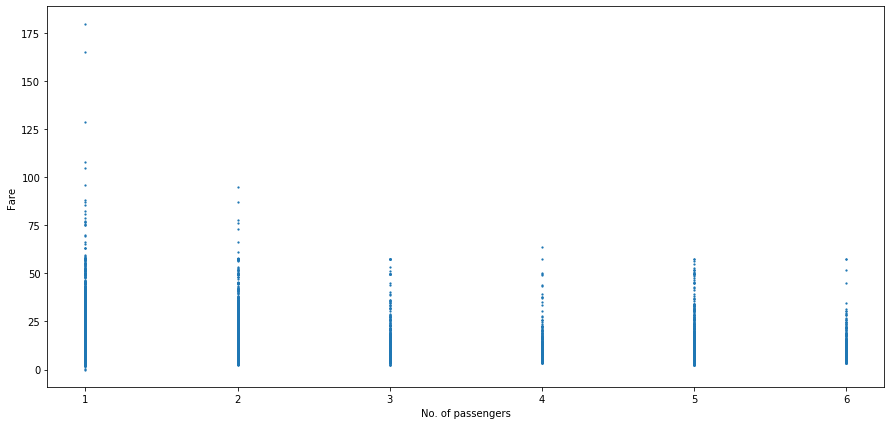

In [59]:
plt.figure(figsize=(15,7))
plt.scatter(x=train['passenger_count'], y=train['fare_amount'], s=1.5)
plt.xlabel('No. of passengers')
plt.ylabel('Fare')
plt.show()

From the above graph we can see that single passengers are the most frequent travellers, and the highest fare also seems to come from cabs which carry just 1 passenger.

### 2. Does the date and time of pickup affect the fare?

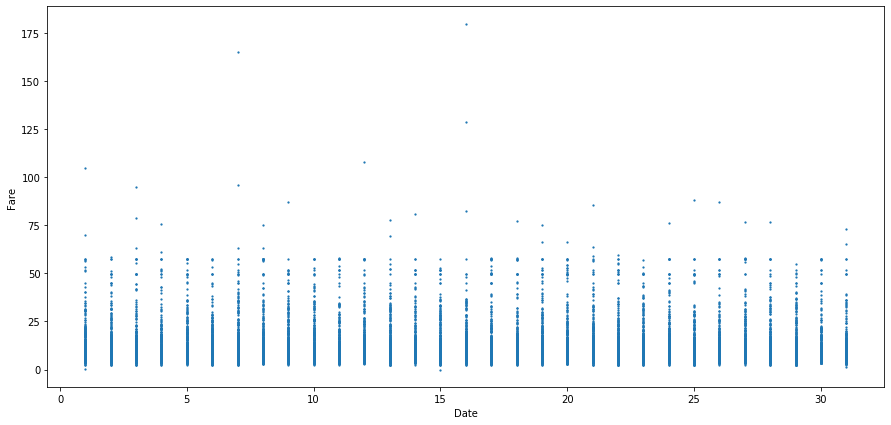

In [60]:
plt.figure(figsize=(15,7))
plt.scatter(x=train['date'], y=train['fare_amount'], s=1.5)
plt.xlabel('Date')
plt.ylabel('Fare')
plt.show()

The fare throughout the month is mostly uniform.

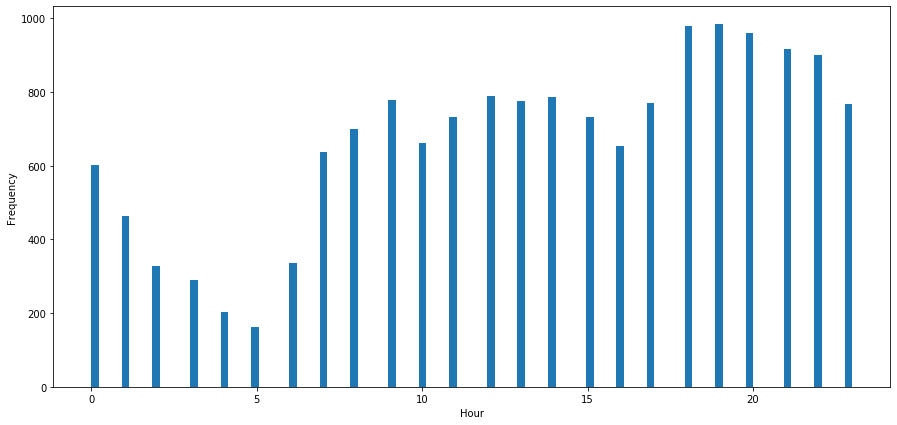

In [61]:
plt.figure(figsize=(15,7))
plt.hist(train['hour'], bins=100)
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.show();

The frequency of cab rides is lowest at 5AM and highest at 7PM

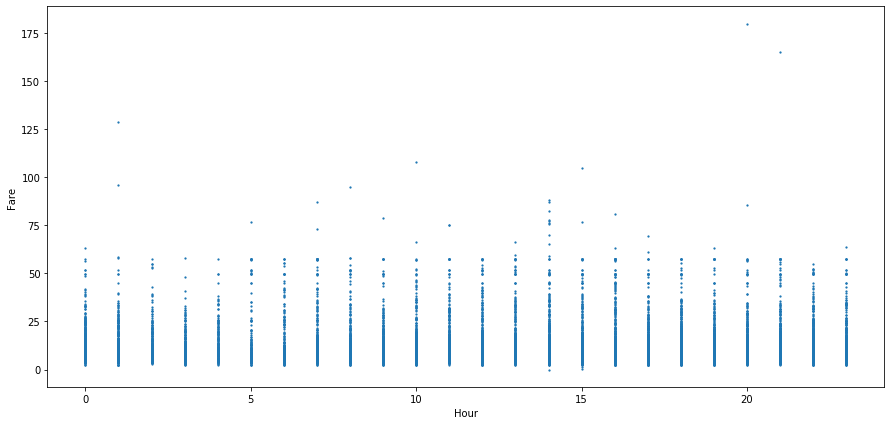

In [62]:
plt.figure(figsize=(15,7))
plt.scatter(train['hour'], train['fare_amount'], s=1.5)
plt.xlabel('Hour')
plt.ylabel('Fare')
plt.show();

The fare seems high after 8PM and before 2PM

### 3. Does the day of the week affect the fare?

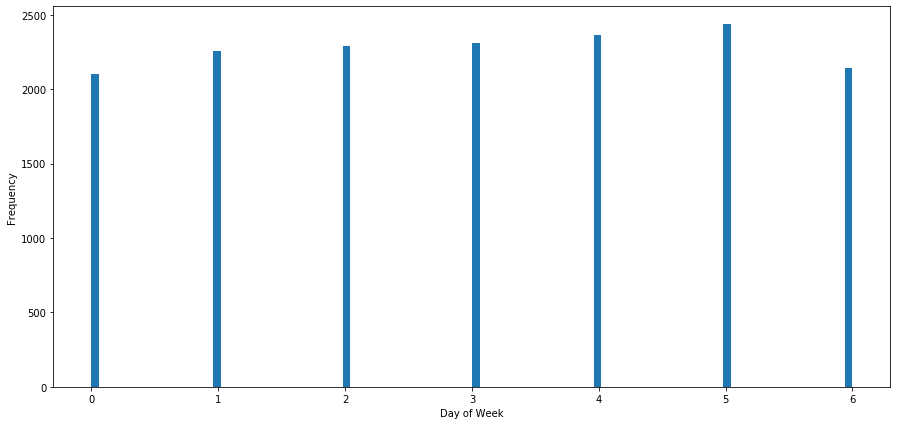

In [63]:
plt.figure(figsize=(15,7))
plt.hist(train['day_of_week'], bins=100)
plt.xlabel('Day of Week')
plt.ylabel('Frequency')
plt.show();

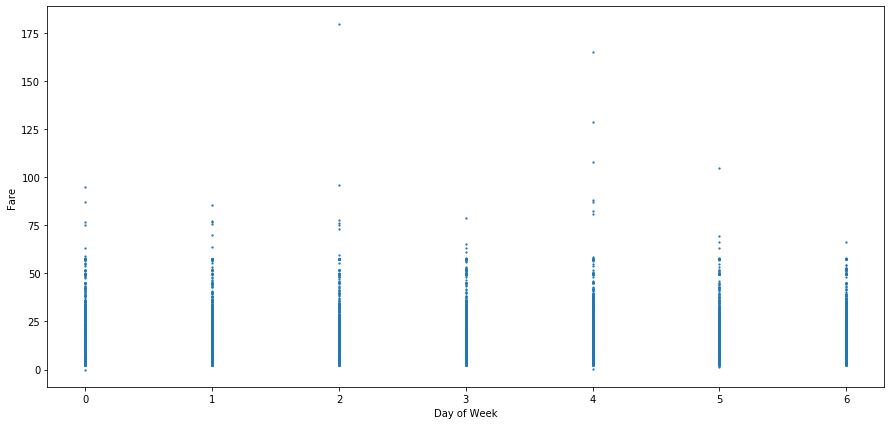

In [64]:
plt.figure(figsize=(15,7))
plt.scatter(x=train['day_of_week'], y=train['fare_amount'], s=1.5)
plt.xlabel('Day of Week')
plt.ylabel('Fare')
plt.show();

The highest fare seems to be on Tuesday. Also, Thursday has good amount of high fare cab rides.

### 4. Does the distance affect the fare?

In [65]:
# First we will check if the distance is huge and fare is not 0, do we have the correct values in the rows.

high_distance = train.loc[(train['haversine_distance']>200)&(train['fare_amount']!=0)]
high_distance

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,haversine_distance,year,month,date,day_of_week,hour
472,2.50,0.000000,0.000000,-74.005433,40.726685,2,8667.304968,2009.0,2.0,22.0,6.0,22.0
1260,5.70,-73.973907,40.754743,0.000000,0.000000,2,8665.268588,2011.0,3.0,10.0,3.0,20.0
2280,8.90,-73.936667,40.757815,0.000000,40.757815,1,6026.494216,2011.0,8.0,29.0,0.0,8.0
2397,45.00,0.000000,0.000000,-74.010230,40.714553,2,8667.454421,2012.0,6.0,24.0,6.0,17.0
4278,7.00,-73.972702,40.757423,0.000000,0.000000,1,8665.223767,2015.0,4.0,7.0,1.0,23.0
4597,6.90,0.000000,0.000000,-73.989693,40.754280,1,8666.566030,2010.0,3.0,30.0,1.0,7.0
5864,8.50,-73.995030,40.744945,-7.986640,40.729937,1,5420.988959,2012.0,3.0,4.0,6.0,1.0
6188,15.50,0.000000,0.000000,-73.952980,40.786670,5,8664.191488,2014.0,7.0,28.0,0.0,15.0
6302,16.50,0.000000,0.000000,-73.936600,40.796543,1,8663.039123,2015.0,2.0,27.0,4.0,16.0
7014,4.50,-73.988980,40.721697,-74.001073,0.728087,3,4447.086698,2011.0,6.0,18.0,5.0,4.0


As you can see from the DF above, the abnormally high distances are due to either the pickup or dropoff co-ordinates being incorrect or 0. However, since all these values have fares, I do not wish to drop them as they contain crucial data. Instead, I will replace the initial distance values with distance values calculated using the fare using the following formula

distance = (fare_amount - 2.5)/1.56

After looking the valid co-ordinates on google map, we find that the data is from U.S locations.
Google search gave me the following price -      
$2.5 base price + $1.56/km

In [66]:
high_distance['haversine_distance'] = high_distance.apply(lambda row: (row['fare_amount'] - 2.50)/1.56, axis=1)
high_distance

C:\Users\GAURAV\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,haversine_distance,year,month,date,day_of_week,hour
472,2.50,0.000000,0.000000,-74.005433,40.726685,2,0.000000,2009.0,2.0,22.0,6.0,22.0
1260,5.70,-73.973907,40.754743,0.000000,0.000000,2,2.051282,2011.0,3.0,10.0,3.0,20.0
2280,8.90,-73.936667,40.757815,0.000000,40.757815,1,4.102564,2011.0,8.0,29.0,0.0,8.0
2397,45.00,0.000000,0.000000,-74.010230,40.714553,2,27.243590,2012.0,6.0,24.0,6.0,17.0
4278,7.00,-73.972702,40.757423,0.000000,0.000000,1,2.884615,2015.0,4.0,7.0,1.0,23.0
4597,6.90,0.000000,0.000000,-73.989693,40.754280,1,2.820513,2010.0,3.0,30.0,1.0,7.0
5864,8.50,-73.995030,40.744945,-7.986640,40.729937,1,3.846154,2012.0,3.0,4.0,6.0,1.0
6188,15.50,0.000000,0.000000,-73.952980,40.786670,5,8.333333,2014.0,7.0,28.0,0.0,15.0
6302,16.50,0.000000,0.000000,-73.936600,40.796543,1,8.974359,2015.0,2.0,27.0,4.0,16.0
7014,4.50,-73.988980,40.721697,-74.001073,0.728087,3,1.282051,2011.0,6.0,18.0,5.0,4.0


In [67]:
train.update(high_distance)

In [68]:
# Rows where distance is 0 and fare is 0

train[(train['haversine_distance']==0)&(train['fare_amount']==0)]

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,haversine_distance,year,month,date,day_of_week,hour


In [69]:
# Rows where distance is 0 and fare is less than $2.50.
train[(train['haversine_distance']==0)&(train['fare_amount'] < 2.5)]

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,haversine_distance,year,month,date,day_of_week,hour


In [70]:
# Rows where distance is not 0 but fare is 0
zero_fare = train.loc[(train['haversine_distance']!=0) & (train['fare_amount']==0)]
zero_fare

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,haversine_distance,year,month,date,day_of_week,hour
10002,0.0,-73.987115,40.738808,-74.005911,40.71396,1.0,3.184763,2010.0,2.0,15.0,0.0,14.0


In [71]:
# There is only one row where distance is not 0 and fare is 0. Hence, imputing fare value using distance formula.
zero_fare['fare_amount'] = 2.5 + 1.56 * zero_fare['haversine_distance']
zero_fare

C:\Users\GAURAV\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,haversine_distance,year,month,date,day_of_week,hour
10002,7.46823,-73.987115,40.738808,-74.005911,40.71396,1.0,3.184763,2010.0,2.0,15.0,0.0,14.0


In [72]:
train.update(zero_fare)

In [73]:
# Rows where distance is 0 and fare is not 0
zero_distance = train.loc[(train['haversine_distance']==0) & (train['fare_amount']!=0)]
zero_distance

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,haversine_distance,year,month,date,day_of_week,hour
11,5.50,0.000000,0.000000,0.000000,0.000000,3.0,0.0,2012.0,12.0,24.0,0.0,11.0
15,5.00,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2013.0,11.0,23.0,5.0,12.0
105,52.00,-74.035839,40.747320,-74.035839,40.747320,1.0,0.0,2009.0,3.0,25.0,2.0,0.0
124,8.00,0.000000,0.000000,0.000000,0.000000,2.0,0.0,2013.0,1.0,17.0,3.0,17.0
191,6.50,-73.998488,40.726303,-73.998488,40.726303,1.0,0.0,2014.0,1.0,8.0,2.0,21.0
192,3.70,0.000000,0.000000,0.000000,0.000000,5.0,0.0,2010.0,9.0,5.0,6.0,17.0
270,7.50,-73.995892,40.746454,-73.995892,40.746454,1.0,0.0,2012.0,8.0,25.0,5.0,1.0
273,8.10,0.000000,0.000000,0.000000,0.000000,4.0,0.0,2009.0,10.0,30.0,4.0,18.0
290,6.90,-73.982432,40.745747,-73.982432,40.745747,1.0,0.0,2009.0,12.0,14.0,0.0,12.0
357,8.50,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2013.0,7.0,4.0,3.0,16.0


In [74]:
# Lets impute them with distance formula.
zero_distance['haversine_distance'] = zero_distance.apply(lambda row: (row['fare_amount'] - 2.50)/1.56, axis=1)

C:\Users\GAURAV\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [75]:
train.update(zero_distance)

In [76]:
train[train.haversine_distance == 0]

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,haversine_distance,year,month,date,day_of_week,hour
376,2.5,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2014.0,5.0,29.0,3.0,5.0
472,2.5,0.000000,0.000000,-74.005433,40.726685,2.0,0.0,2009.0,2.0,22.0,6.0,22.0
503,2.5,-73.998720,40.624708,-73.998720,40.624708,1.0,0.0,2010.0,1.0,19.0,1.0,1.0
657,2.5,-73.986410,40.763350,-73.986410,40.763350,1.0,0.0,2009.0,8.0,25.0,1.0,1.0
958,2.5,0.000000,0.000000,0.000000,0.000000,5.0,0.0,2011.0,2.0,22.0,1.0,14.0
1419,2.5,-73.956556,40.779828,-73.956556,40.779828,1.0,0.0,2013.0,7.0,21.0,6.0,0.0
1774,2.5,-73.950282,40.701282,-73.950282,40.701282,1.0,0.0,2012.0,8.0,27.0,0.0,15.0
3168,2.5,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2012.0,7.0,6.0,4.0,22.0
4367,2.5,-73.948410,40.744969,-73.948410,40.744969,1.0,0.0,2014.0,1.0,13.0,0.0,16.0
4954,2.5,-73.983934,40.754938,-73.983934,40.754938,1.0,0.0,2010.0,1.0,10.0,6.0,13.0


In [77]:
#From above table we can see distance value is 0 and fare is 2.5, because the pickup and dropoff coordinates are same or they are 0.
#Hence we will remove them from the data.
train.drop(train[train.haversine_distance==0].index, axis=0, inplace=True)

In [78]:
train[train.haversine_distance==0]

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,haversine_distance,year,month,date,day_of_week,hour


In [79]:
#Also deleting such values from test data also.
test.drop(test[test.haversine_distance==0].index,axis=0,inplace=True)

In [80]:
test[test.haversine_distance==0]

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,haversine_distance,year,month,date,day_of_week,hour


In [81]:
temp = train
train = temp

# Data Visualization

In [82]:
train.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'haversine_distance', 'year', 'month', 'date', 'day_of_week', 'hour'],
      dtype='object')

#### Univariate Analysis

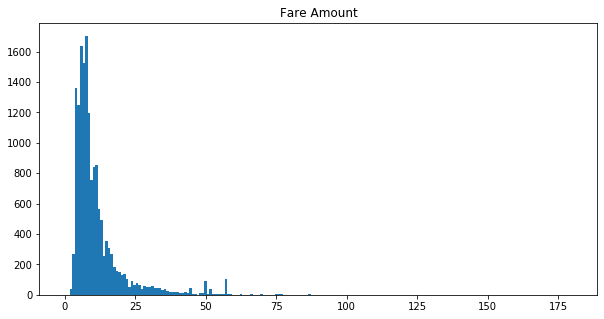

In [83]:
plt.figure(figsize=(10,5))
plt.hist(x=train['fare_amount'], bins=200)
plt.title("Fare Amount")
plt.show()

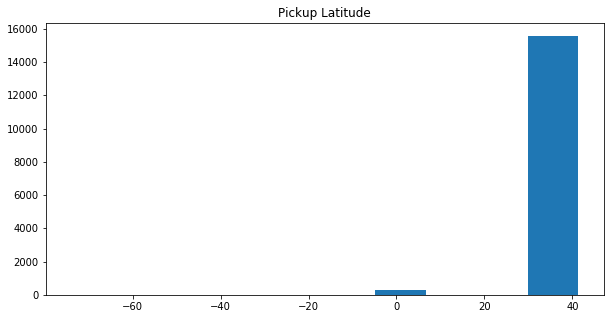

In [84]:
plt.figure(figsize=(10,5))
plt.hist(train['pickup_latitude'])
plt.title("Pickup Latitude")
plt.show()

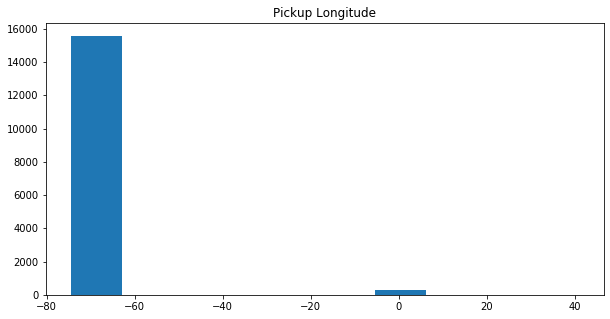

In [85]:
plt.figure(figsize=(10,5))
plt.hist(train['pickup_longitude'])
plt.title("Pickup Longitude")
plt.show()

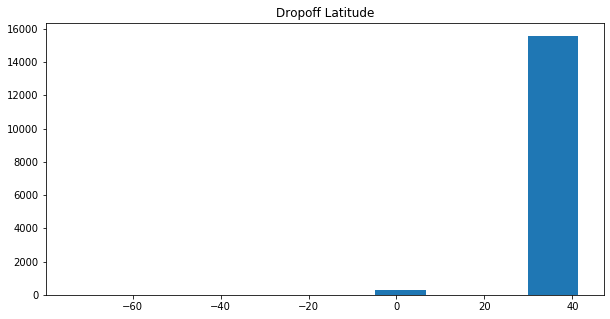

In [86]:
plt.figure(figsize=(10,5))
plt.hist(train['dropoff_latitude'])
plt.title("Dropoff Latitude")
plt.show()

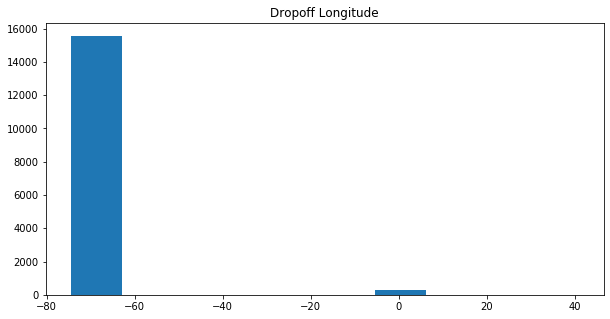

In [87]:
plt.figure(figsize=(10,5))
plt.hist(train['dropoff_longitude'])
plt.title("Dropoff Longitude")
plt.show()

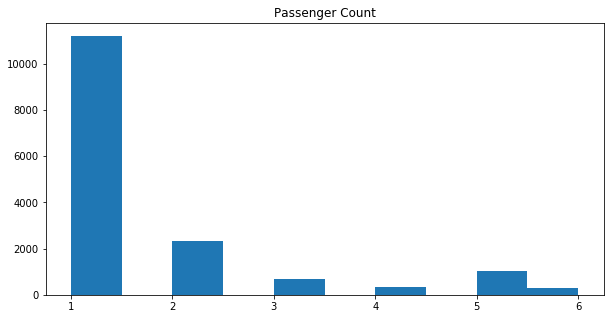

In [88]:
plt.figure(figsize=(10,5))
plt.hist(train['passenger_count'])
plt.title("Passenger Count")
plt.show()
#Based on the passengers, we can see that single passengers travelled higher

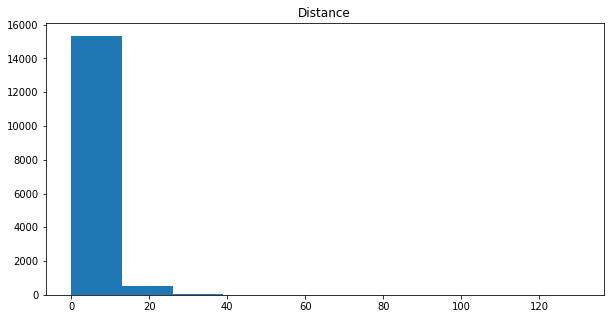

In [89]:
plt.figure(figsize=(10,5))
plt.hist(train['haversine_distance'], bins=10)
plt.title("Distance")
plt.show()
#Maximum number of passengers are travelled less than 20km

#### Bivariate Analysis

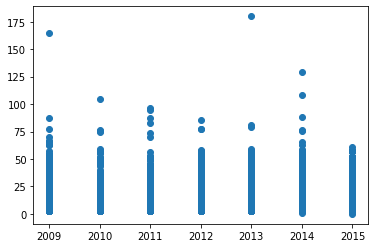

In [90]:
# Visualization between fare_amount and years.
plt.scatter(x=train['year'], y=train['fare_amount'])
plt.show()
# Based on the scatterplot, in year 2009 and 2013 there were rides which got high fare_amount and very low on year 2015

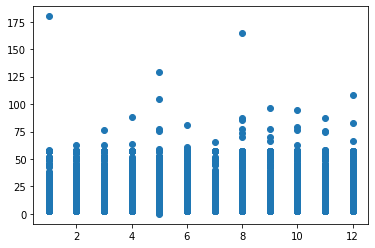

In [91]:
# Visualization between fare_amount and months.
plt.scatter(x=train['month'], y=train['fare_amount'])
plt.show()
# Based on the scatterplot,We can see Jan month fare amount is very high and low in July month.

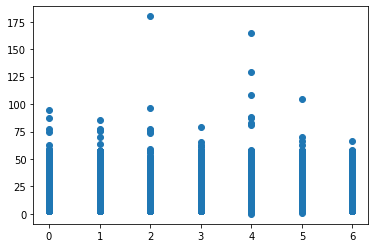

In [92]:
# Visualization between fare_amount and weekday.
plt.scatter(x=train['day_of_week'], y=train['fare_amount'])
plt.show()
# Based on the scatterplot,We can see that Tuesday ride has the highest fare_amount

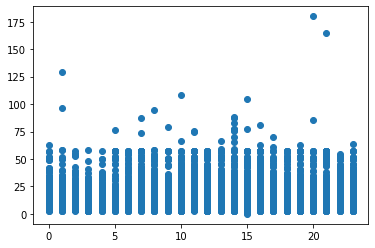

In [93]:
# Visualization between fare_amount and time.
plt.scatter(x=train['hour'], y=train['fare_amount'])
plt.show()
# Rides taken during 8 pm to 9 pm gives highest fare_amount

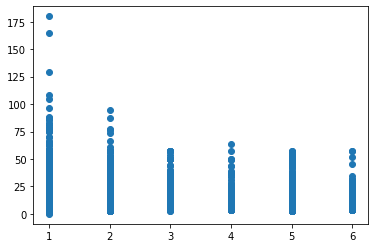

In [94]:
# Visualization between fare_amount and passenger_count
plt.scatter(x=train['passenger_count'], y=train['fare_amount'])
plt.show()

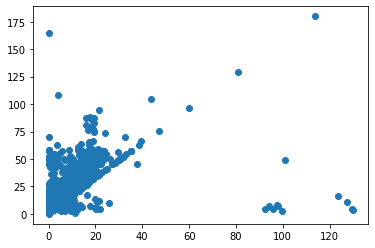

In [95]:
# Visualization between fare_amount and distance
plt.scatter(x=train['haversine_distance'], y=train['fare_amount'])
plt.show()
# we can see as the distance increases fare amount also increases

# Feature Selection

In [96]:
train.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'haversine_distance', 'year', 'month', 'date', 'day_of_week', 'hour'],
      dtype='object')

In [97]:
train.dtypes

fare_amount           float64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
passenger_count       float64
haversine_distance    float64
year                  float64
month                 float64
date                  float64
day_of_week           float64
hour                  float64
dtype: object

In [98]:
# Lets convert passenger_count into int64 data type
train['passenger_count'] = train['passenger_count'].astype('int64')

In [99]:
# Similarly convert year,month,date,day,hour as these comes under categorical variables
for i in [train,test]:
    i['year'] = i['year'].astype('object')
    i['month'] = i['month'].astype('object')
    i['date'] = i['date'].astype('object')
    i['day_of_week'] = i['day_of_week'].astype('object')
    i['hour'] = i['hour'].astype('object')

In [100]:
train.dtypes

fare_amount           float64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
passenger_count         int64
haversine_distance    float64
year                   object
month                  object
date                   object
day_of_week            object
hour                   object
dtype: object

In [101]:
test.dtypes

pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
passenger_count         int64
haversine_distance    float64
year                   object
month                  object
date                   object
day_of_week            object
hour                   object
dtype: object

In [102]:
numeric = ['fare_amount', 'pickup_longitude', 'pickup_latitude', 
           'dropoff_longitude', 'dropoff_latitude', 'passenger_count','haversine_distance']
categorical = ['year','month', 'date', 'day_of_week', 'hour']

#### Correlation Analysis

In [103]:
df_corr = train.loc[:,numeric]

                    fare_amount  pickup_longitude  pickup_latitude  \
fare_amount            1.000000          0.012520        -0.013591   
pickup_longitude       0.012520          1.000000        -0.982932   
pickup_latitude       -0.013591         -0.982932         1.000000   
dropoff_longitude      0.012850          0.969927        -0.954714   
dropoff_latitude      -0.013998         -0.957337         0.976110   
passenger_count        0.006427         -0.003037         0.002051   
haversine_distance     0.710859          0.069726        -0.063908   

                    dropoff_longitude  dropoff_latitude  passenger_count  \
fare_amount                  0.012850         -0.013998         0.006427   
pickup_longitude             0.969927         -0.957337        -0.003037   
pickup_latitude             -0.954714          0.976110         0.002051   
dropoff_longitude            1.000000         -0.977127        -0.004667   
dropoff_latitude            -0.977127          1.000000    

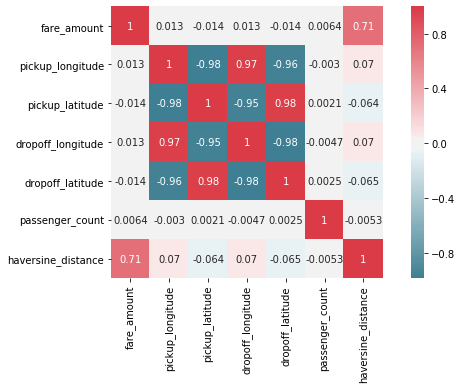

In [104]:
f, ax = plt.subplots(figsize=(10, 5))

#Generate correlation matrix
corr = df_corr.corr()

print(corr)# From correlation analysis we can say distance is significant variable to pass in to the model 

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax,annot=True)

#### Anova Test

In [105]:
# Anova Test is performed between categorical independent variables & fare_amount(continuous target variable) 

import statsmodels.api as sm
from statsmodels.formula.api import ols

for i in categorical:
    mod = ols('fare_amount' + '~' + i, data = train).fit()
    aov_table = sm.stats.anova_lm(mod, typ = 2)
    print(aov_table)
    
# From the anova result, we can observe Date ,weekday
# has p value > 0.05, so delete these variables and should not be considered in model.

                sum_sq       df          F        PR(>F)
year      2.154747e+04      6.0  38.958425  2.762441e-47
Residual  1.462551e+06  15866.0        NaN           NaN
                sum_sq       df         F    PR(>F)
month     4.150925e+03     11.0  4.044236  0.000006
Residual  1.479947e+06  15861.0       NaN       NaN
                sum_sq       df         F    PR(>F)
date      1.822500e+03     30.0  0.649273  0.929301
Residual  1.482276e+06  15842.0       NaN       NaN
                   sum_sq       df         F    PR(>F)
day_of_week  6.995622e+02      6.0  1.247052  0.278602
Residual     1.483399e+06  15866.0       NaN       NaN
                sum_sq       df         F        PR(>F)
hour      8.883680e+03     23.0  4.149652  9.308214e-11
Residual  1.475215e+06  15849.0       NaN           NaN


In [106]:
train.drop(['date','day_of_week'], axis=1, inplace=True)
test.drop(['date','day_of_week'], axis=1, inplace=True)

In [107]:
categorical = ['year', 'month', 'hour']

In [108]:
#Since we have calculated distance from coordinates, we will drop pickup and dropoff latitudes and longitudes.
train.drop(['pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude'], axis=1, inplace=True)
test.drop(['pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude'], axis=1, inplace=True)

In [109]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15873 entries, 0 to 16065
Data columns (total 6 columns):
fare_amount           15873 non-null float64
passenger_count       15873 non-null int64
haversine_distance    15873 non-null float64
year                  15873 non-null object
month                 15873 non-null object
hour                  15873 non-null object
dtypes: float64(2), int64(1), object(3)
memory usage: 868.1+ KB


In [110]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9829 entries, 0 to 9913
Data columns (total 5 columns):
passenger_count       9829 non-null int64
haversine_distance    9829 non-null float64
year                  9829 non-null object
month                 9829 non-null object
hour                  9829 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 460.7+ KB


#### Feature Scaling

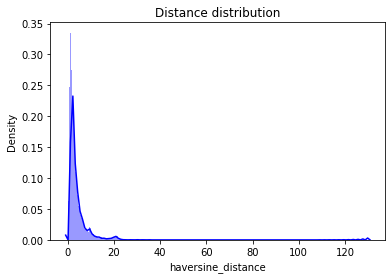

In [111]:
sns.distplot(train['haversine_distance'],bins='auto',color='blue')
plt.title("Distance distribution")
plt.ylabel("Density")
plt.show()

In [112]:
# The distance variable is right skewed we can reduce this skewness using log transformation
train['haversine_distance'] = np.log(train['haversine_distance'])

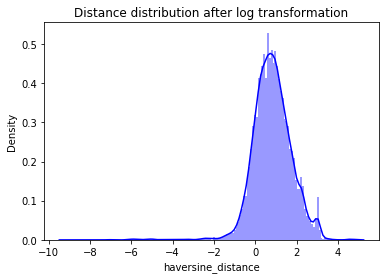

In [113]:
sns.distplot(train['haversine_distance'],bins='auto',color='blue')
plt.title("Distance distribution after log transformation")
plt.ylabel("Density")
plt.show()

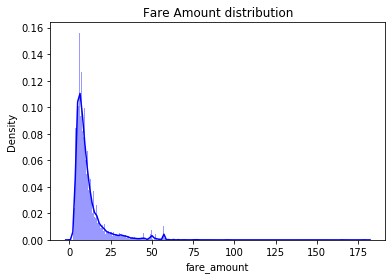

In [114]:
sns.distplot(train['fare_amount'],bins='auto',color='blue')
plt.title("Fare Amount distribution")
plt.ylabel("Density")
plt.show()
#Even fare is right skewed.

In [115]:
#Using log transformation.
train['fare_amount'] = np.log(train['fare_amount'])

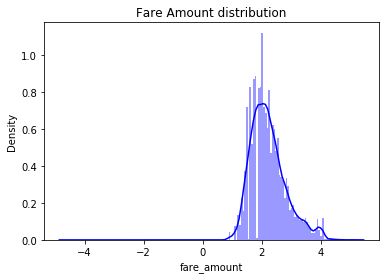

In [116]:
sns.distplot(train['fare_amount'],bins='auto',color='blue')
plt.title("Fare Amount distribution")
plt.ylabel("Density")
plt.show()

Similarly we will check and transform test data

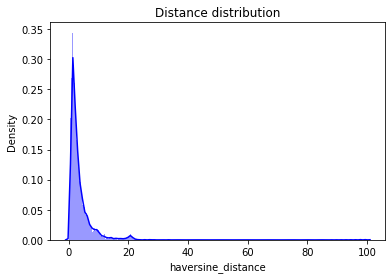

In [117]:
sns.distplot(test['haversine_distance'],bins='auto',color='blue')
plt.title("Distance distribution")
plt.ylabel("Density")
plt.show()

In [118]:
test['haversine_distance'] = np.log(test['haversine_distance'])

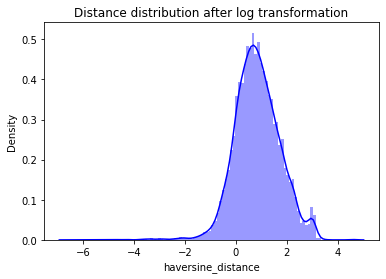

In [119]:
sns.distplot(test['haversine_distance'],bins='auto',color='blue')
plt.title("Distance distribution after log transformation")
plt.ylabel("Density")
plt.show()

We can observe now, after applying log function, the data is normalised.

# Model Development

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [121]:
X = train.drop(['fare_amount'],axis=1)
y = train['fare_amount']

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Linear Regression

In [123]:
linear_regression_model = LinearRegression()

In [124]:
linear_regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [125]:
y_pred_lr = linear_regression_model.predict(X_test)

In [126]:
#Calculating RMSE
RMSE_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
print("Root mean squared error = ", str(RMSE_lr))

Root mean squared error =  0.3917272481977636


In [127]:
#Calculating R^2
print("R^2 score = ", str(r2_score(y_test, y_pred_lr)))

R^2 score =  0.5799510435326292


### Decision Tree
    

In [128]:
decision_tree_model = DecisionTreeRegressor(max_depth=5, random_state=42)

In [129]:
decision_tree_model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

In [130]:
y_pred_dt = decision_tree_model.predict(X_test)

In [131]:
#Calculating RMSE
RMSE_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
print("Root mean squared error = ", str(RMSE_dt))

Root mean squared error =  0.2913631751418235


In [132]:
#Calculating R^2
print("R^2 score = ", str(r2_score(y_test, y_pred_dt)))

R^2 score =  0.7676184366566188


### Random Forest Model

In [133]:
random_forest_model = RandomForestRegressor(n_estimators=200, random_state=42)

In [134]:
random_forest_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [135]:
y_pred_rf = random_forest_model.predict(X_test)

In [136]:
#Calculating RMSE
RMSE_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print("Root mean squared error = ", str(RMSE_rf))

Root mean squared error =  0.3009358644177034


In [137]:
#Calculating R^2
print("R^2 score = ", str(r2_score(y_test, y_pred_rf)))

R^2 score =  0.752097878436571


### Gradient Boosting:

In [138]:
gradient_boosting_model = GradientBoostingRegressor(random_state=42)

In [139]:
gradient_boosting_model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [140]:
y_pred_gb = gradient_boosting_model.predict(X_test)

In [141]:
#Calculating RMSE
RMSE_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
print("Root mean squared error = ", str(RMSE_gb))

Root mean squared error =  0.28328158762151934


In [142]:
#Calculating R^2
print("R^2 score = ", str(r2_score(y_test, y_pred_gb)))

R^2 score =  0.7803308638934974


### Optimizing using parameter tuning:

#### Randomized Search CV on Random Forest

In [143]:
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(random_forest_model.get_params())

Parameters currently in use:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [144]:
random_forest_m = RandomForestRegressor(random_state=42)
n_estimator = list(range(11,20,2))
depth = list(range(1,100,2))

#Create random grid
rand_grid = {'n_estimators' : n_estimator, 'max_depth' : depth}

In [145]:
rsc_rf = RandomizedSearchCV(random_forest_m, param_distributions=rand_grid, n_iter=5, cv=5, random_state=42)

In [146]:
rsc_rf.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_state=4

In [147]:
y_pred_rsc_rf = rsc_rf.predict(X_test)

In [148]:
#R^2
rsc_rf_r2 = r2_score(y_test, y_pred_rsc_rf)
#Calculating RMSE
rsc_rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rsc_rf))

print('Random Search CV Random Forest Regressor Model Performance:')
print('Best Parameters = ', rsc_rf.best_params_)
print('R-squared = {:0.2}'.format(rsc_rf_r2))
print('RMSE = ',rsc_rf_rmse)

Random Search CV Random Forest Regressor Model Performance:
Best Parameters =  {'n_estimators': 15, 'max_depth': 57}
R-squared = 0.74
RMSE =  0.31004077197460206


#### Randomized Search CV on Gradient Boost

In [149]:
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(gradient_boosting_model.get_params())

Parameters currently in use:

{'alpha': 0.9,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'auto',
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


In [150]:
gradient_boosting_m = GradientBoostingRegressor(random_state=42)
n_estimator = list(range(11,20,2))
depth = list(range(1,100,2))

In [151]:
# Create the random grid
rand_grid = {'n_estimators': n_estimator,
               'max_depth': depth}

In [152]:
rsc_gb = RandomizedSearchCV(gradient_boosting_m, param_distributions=rand_grid, n_iter=5, cv=5, random_state=42)

In [153]:
rsc_gb.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=GradientBoostingRegressor(alpha=0.9,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                            

In [154]:
y_pred_rsc_gb = rsc_gb.predict(X_test)

In [155]:
#R^2
rsc_gb_r2 = r2_score(y_test, y_pred_rsc_gb)
#Calculating RMSE
rsc_gb_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rsc_gb))

print('Random Search CV Gradient Boosting Model Performance:')
print('Best Parameters = ', rsc_gb.best_params_)
print('R-squared = {:0.2}'.format(rsc_gb_r2))
print('RMSE = ', rsc_gb_rmse)

Random Search CV Gradient Boosting Model Performance:
Best Parameters =  {'n_estimators': 13, 'max_depth': 3}
R-squared = 0.7
RMSE =  0.33234735212900013


#### Grid Search CV on Random Forest

In [156]:
regr = RandomForestRegressor(random_state = 42)
n_estimator = list(range(11,20,2))
depth = list(range(5,15,2))

# Create the grid
grid_search = {'n_estimators': n_estimator,
               'max_depth': depth}

## Grid Search Cross-Validation with 5 fold CV
gridcv_rf = GridSearchCV(regr, param_grid = grid_search, cv = 5)
gridcv_rf = gridcv_rf.fit(X_train,y_train)
view_best_params_GRF = gridcv_rf.best_params_

#Apply model on test data
predictions_GRF = gridcv_rf.predict(X_test)

#R^2
GRF_r2 = r2_score(y_test, predictions_GRF)
#Calculating RMSE
GRF_rmse = np.sqrt(mean_squared_error(y_test,predictions_GRF))

print('Grid Search CV Random Forest Regressor Model Performance:')
print('Best Parameters = ',view_best_params_GRF)
print('R-squared = {:0.2}'.format(GRF_r2))
print('RMSE = ',(GRF_rmse))

Grid Search CV Random Forest Regressor Model Performance:
Best Parameters =  {'max_depth': 7, 'n_estimators': 19}
R-squared = 0.76
RMSE =  0.2931642433186812


#### Grid Search CV on Gradient Boost

In [157]:
gb = GradientBoostingRegressor(random_state = 42)
n_estimator = list(range(11,20,2))
depth = list(range(5,15,2))

# Create the grid
grid_search = {'n_estimators': n_estimator,
               'max_depth': depth}

## Grid Search Cross-Validation with 5 fold CV
gridcv_gb = GridSearchCV(gb, param_grid = grid_search, cv = 5)
gridcv_gb = gridcv_gb.fit(X_train,y_train)
view_best_params_Ggb = gridcv_gb.best_params_

#Apply model on test data
predictions_Ggb = gridcv_gb.predict(X_test)

#R^2
Ggb_r2 = r2_score(y_test, predictions_Ggb)
#Calculating RMSE
Ggb_rmse = np.sqrt(mean_squared_error(y_test,predictions_Ggb))

print('Grid Search CV Gradient Boosting regression Model Performance:')
print('Best Parameters = ',view_best_params_Ggb)
print('R-squared = {:0.2}.'.format(Ggb_r2))
print('RMSE = ',(Ggb_rmse))

Grid Search CV Gradient Boosting regression Model Performance:
Best Parameters =  {'max_depth': 5, 'n_estimators': 19}
R-squared = 0.75.
RMSE =  0.2998601342482256


# Prediction of fare from provided test dataset:

We have already cleaned and processed our test dataset along with our training dataset. Hence we will be predicting using grid search CV for random forest model

In [158]:
#Apply model on test data
predictions_GRF_test_Df = gridcv_rf.predict(test)

In [159]:
test['Predicted Fare'] = predictions_GRF_test_Df

In [160]:
test.head()

,passenger_count,haversine_distance,year,month,hour,Predicted Fare
0,1,0.842971,2015,1,13,2.245965
1,1,0.885977,2015,1,13,2.290162
2,1,-0.480251,2011,10,11,1.486161
3,1,0.673471,2012,12,21,2.044164
4,1,1.684045,2012,12,21,2.778691


In [161]:
test.to_csv('test_python.csv', index=False)